In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("website_data.csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


# Data Cleaning and Transformation

In [3]:
# Set the first row of the dataframe as column names
df.columns = df.iloc[0]

# Remove the first row (since it is now used as headers) and reset row numbers
df = df.drop(index = 0).reset_index(drop = True)

# Rename all columns with clear, proper names
df.columns = ["Primary Channel Group", "Date & Hour", "Users", "Sessions", "Engaged sessions",	"Average engagement time per session", "Engaged sessions per user",	"Events per session", "Engagement rate", "Event count"]
df.head()

,Primary Channel Group,Date & Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Primary Channel Group                3182 non-null   object
 1   Date & Hour                          3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [6]:
# Convert "Date & Hour" column into proper datetime format
df["Date & Hour"] = pd.to_datetime(df["Date & Hour"], format="%Y%m%d%H", errors='coerce')

# Select all columns except text/date columns and Convert selected columns to numeric
numeric_cols = df.columns.drop(["Primary Channel Group", "Date & Hour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Create a new column that stores only the hour from Date & Hour
df["Hour"] = df["Date & Hour"].dt.hour
df.head() 

,Primary Channel Group,Date & Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Primary Channel Group                3182 non-null   object        
 1   Date & Hour                          3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [8]:
df.describe()

,Date & Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# Data Visualization

## Q1. What patterns or trends can you observe in website sessions and users over time?

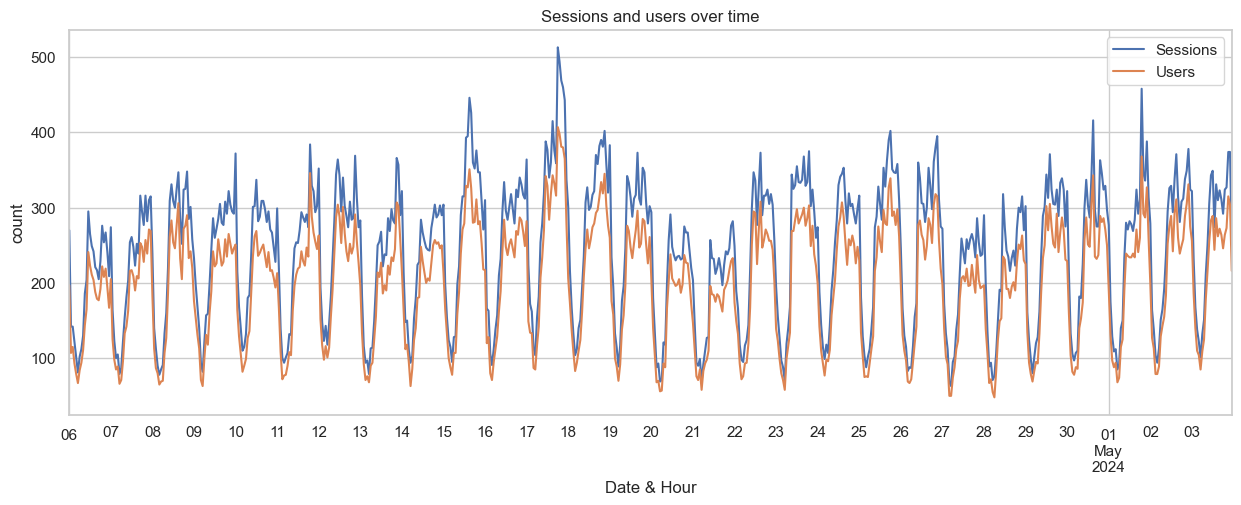

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))

# Group data by Date & Hour, sum Sessions and Users, and plot them on the same graph
df.groupby("Date & Hour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("Date & Hour")
plt.ylabel("count")
plt.show()


### From the above graph we can observe that-
#### There is a major peak between 15th April to 18th April, where both users and sessions increase sharply. After 18th April, traffic drops slightly, then again shows peaks around 30th April–2nd May.

## Q2. Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

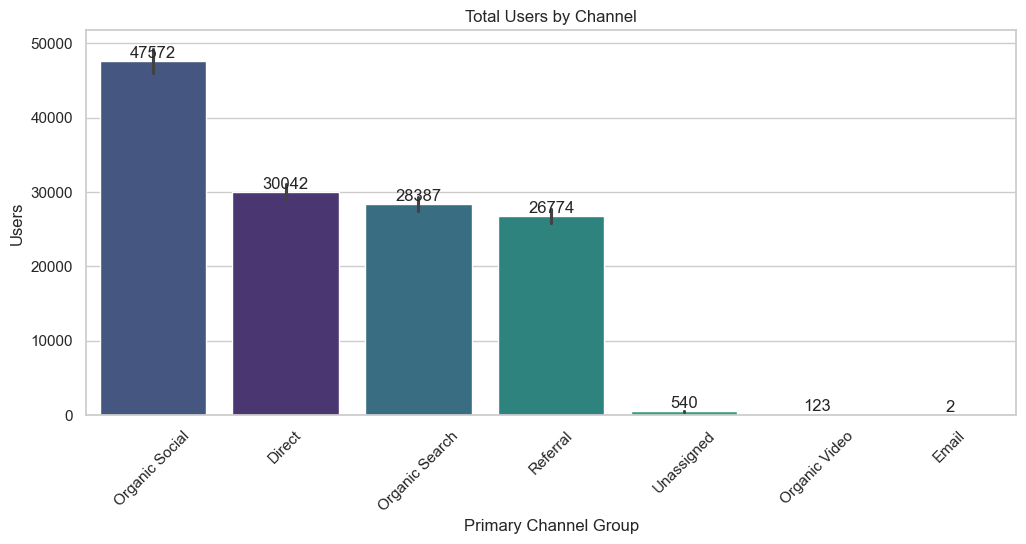

In [26]:
plt.figure(figsize=(12, 5))

# Decide the order of channels based on descending average users
order = (df.groupby("Primary Channel Group")["Users"].mean().sort_values(ascending=False).index)

# Create a bar chart showing total users by channel
ax = sns.barplot(
    data=df, 
    x="Primary Channel Group", 
    y="Users", estimator=np.sum, 
    order=order, 
    hue="Primary Channel Group", 
    palette="viridis"
)

# Add numbers on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title("Total Users by Channel")
plt.show()

### From the above graph we can observe that-
#### Organic Social has brought the highest number of users to the website. This shows that users are actively discovering the website through social media platforms rather than paid or referral sources. 
#### We can replicate successful social media content (topics, formats, messaging) to improve traffic from other sources.

## Q3. Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

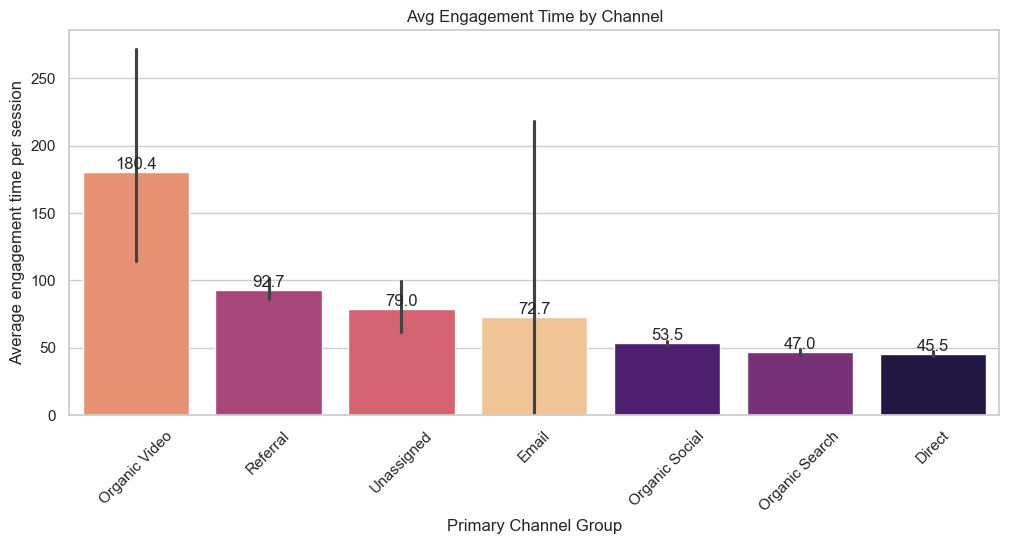

In [25]:
plt.figure(figsize=(12, 5))

# Decide the order of channels based on descending average engagement time
order = (df.groupby("Primary Channel Group")["Average engagement time per session"].mean().sort_values(ascending=False).index)

# Create a bar chart for average engagement time by channel
ax = sns.barplot(
    data=df, 
    x="Primary Channel Group", 
    y="Average engagement time per session", 
    estimator=np.mean, order=order, 
    hue="Primary Channel Group", 
    palette="magma"
)

# Add average engagement time values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()


### From the above graph we can observe that-
#### Users coming through Organic Video spend more time per session on the website compared to other channels.
#### Users already have some context about the content (from the video), so they explore the website more deeply and the video content must be highly effective in attracting quality traffic.

## Q4. How does engagement rate vary across different traffic channels?

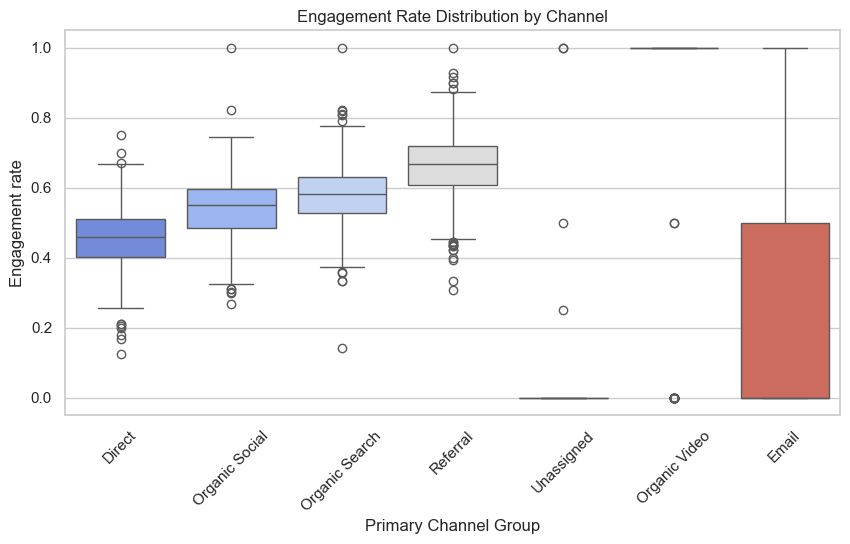

In [27]:
plt.figure(figsize=(10, 5))

# Draw a boxplot showing engagement rate distribution per channel
sns.boxplot(
    data=df, 
    x="Primary Channel Group", 
    y="Engagement rate", 
    hue="Primary Channel Group", 
    palette="coolwarm"
)

plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()


### From the above graph we can observe that-
#### Engagement rate varies significantly across channels, with Referral and Organic Search driving the most engaged users, while Email and Unassigned channels show high variability, indicating inconsistent user quality and potential tracking issues.

## Q5. Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

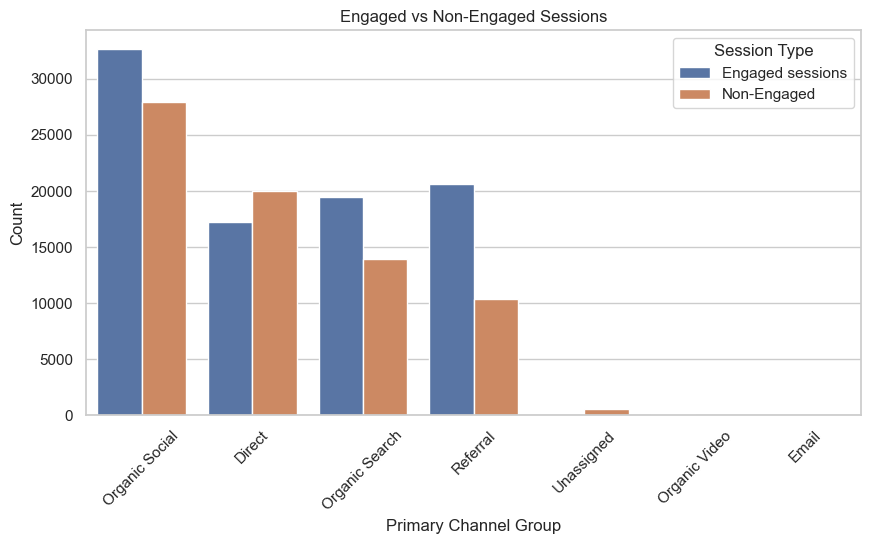

In [38]:
# group and calculate
session_df = df.groupby("Primary Channel Group")[["Sessions", "Engaged sessions"]].sum()

# calculate non-engaged sessions
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]

# bring index back as a column 
session_df = session_df.reset_index()

# reshape data
session_df_melted = session_df.melt(
    id_vars="Primary Channel Group",
    value_vars=["Engaged sessions", "Non-Engaged"],
    var_name="Session Type",
    value_name="Count"
)

# order by total sessions (descending)
order = (session_df.sort_values("Sessions", ascending=False)["Primary Channel Group"])

# plot 
plt.figure(figsize=(10, 5))
sns.barplot(
    data=session_df_melted,
    x="Primary Channel Group",
    y="Count",
    hue="Session Type",
    order=order
)
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()


### From the above graph we can observe that-
#### Referral, Organic Search, and Organic Social channels drive more engaged sessions, indicating high-quality traffic, while Direct, Email, and Unassigned channels show lower engagement, highlighting the need for better landing page optimization, targeting, and tracking improvements.

# Q6.  At what hours of the day does each channel drive the most traffic?

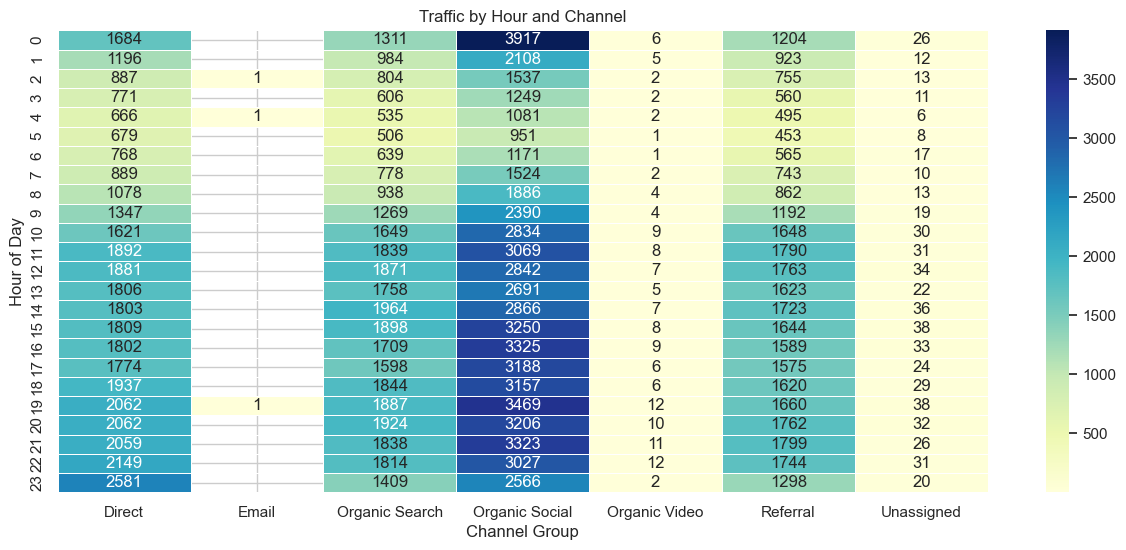

In [42]:
# Group data by Hour and Primary Channel Group, then sum sessions, 'unstack()' converts one level of the index into columns for the heatmap
heatmap_data = df.groupby(["Hour", "Primary Channel Group"])["Sessions"].sum().unstack()
plt.figure(figsize=(15, 6))

# plot the heatmap
sns.heatmap(
    heatmap_data, 
    cmap="YlGnBu", 
    linewidths=.5, 
    annot=True, 
    fmt='.0f'
)
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()


### From the above graph we can observe that-
#### Traffic patterns vary by channel, with Organic Search and Referral peaking during work hours, Organic Social dominating afternoons, and Direct traffic surging late at night, highlighting the importance of time-based channel optimization.

## Q7. Is there any correlation between high traffic (sessions) and high engagement rate over time? 

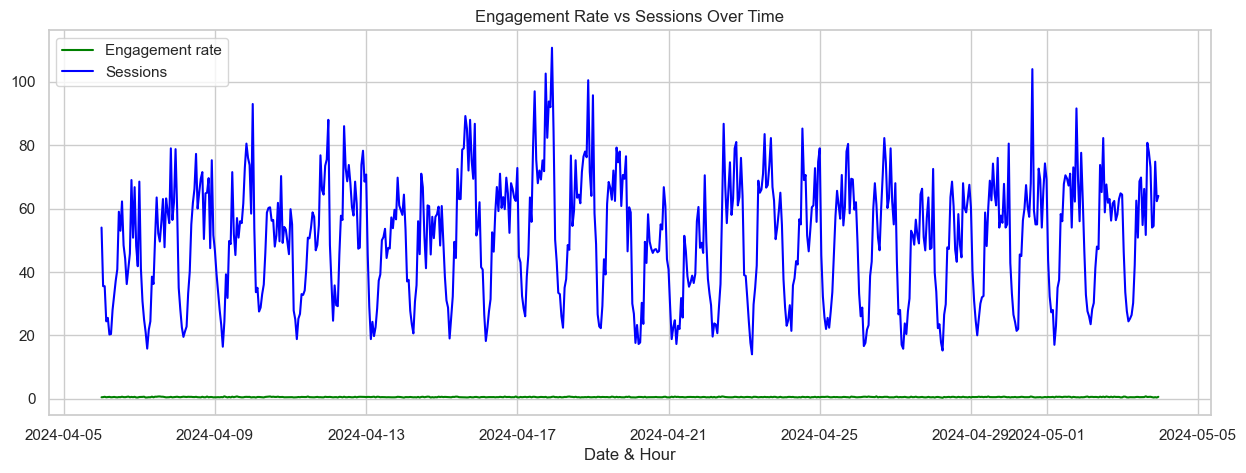

In [47]:
# Group by Date & Hour and calculate the mean of Engagement rate and Sessions
# Reset index so Date & Hour becomes a column again
df_plot = df.groupby("Date & Hour")[["Engagement rate", "Sessions"]].mean().reset_index()
plt.figure(figsize=(15, 5))

# Plot Engagement rate over time
plt.plot(
    df_plot["Date & Hour"], 
    df_plot["Engagement rate"], 
    label="Engagement rate", 
    color="green"
)

# Plot Sessions over time on the same graph
plt.plot(
    df_plot["Date & Hour"], 
    df_plot["Sessions"], 
    label="Sessions", 
    color="blue"
)

plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("Date & Hour")
plt.legend()
plt.grid(True)
plt.show()


### From the above graph we can observe that-
#### The graph shows no strong correlation between session spikes and engagement rate over time. While traffic volume fluctuates significantly, engagement remains relatively stable, indicating that higher traffic does not necessarily translate into more engaged users.